<a href="https://colab.research.google.com/github/devkakeri06/credit-card-analysis/blob/main/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Credit Card Customer Behaviour Analysis**

Overview: This case requires you to develop a customer segmentation to define marketing strategy.
The sample dataset summarizes the usage behavior of about 9000 active credit card holders during
the last 6 months. The file is at a customer level with 18 behavioral variables.
Expectations from the candidate:
 Advanced data preparation: Build an ‘enriched’ customer profile by deriving “intelligent”
KPIs such as:
o Monthly average purchase and cash advance amount
o Purchases by type (one-off, installments)
o Average amount per purchase and cash advance transaction,
o Limit usage (balance to credit limit ratio),
o Payments to minimum payments ratio etc (think of more types of similar
analysis)

 Advanced reporting: Use the derived KPIs to gain insight on the customer profiles.
 Identification of the relationships/ affinities between services.
 Clustering: Apply a data reduction technique factor analysis for variable reduction
technique and a clustering algorithm to reveal the behavioral segments of credit card
holders
 Identify cluster characteristics of the cluster using detailed profiling.
 Provide the strategic insights and implementation of strategies for given set of cluster
characteristics

In [34]:
import pandas as pd
df = pd.read_csv("/content/Data_problem  1.csv")

In [35]:
print(df.shape)
print(df.keys())

(8950, 18)
Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')


In [36]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [38]:
df.dropna(inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

In [40]:
df["Monthly_Avg_Purchase"] = df["PURCHASES"]/df["TENURE"] 
df["Monthly_Avg_Cash_Adv"] = df["CASH_ADVANCE"]/df["TENURE"] 
df["On-Off_Purchases(%)"]  = (df["ONEOFF_PURCHASES"]/df["PURCHASES"])*100
df["Installment_Purchases(%)"]  = (df["INSTALLMENTS_PURCHASES"]/df["PURCHASES"])*100
df["Bal/Crd. Limit ratio"] = df["BALANCE"] / df["CREDIT_LIMIT"]
df["Payments/Min. Payments ratio"] = df["PAYMENTS"] / df["MINIMUM_PAYMENTS"]

In [41]:
df.head(30)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Avg_Cash_Adv,On-Off_Purchases(%),Installment_Purchases(%),Bal/Crd. Limit ratio,Payments/Min. Payments ratio
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.000000,100.000000,0.040901,1.446508
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,NaN,NaN,0.457495,3.826241
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,622.066742,627.284787,0.000000,12,64.430833,0.000000,100.000000,0.000000,0.332687,0.991682
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,678.334763,244.791237,0.000000,12,1.333333,0.000000,100.000000,0.000000,0.681429,2.771075
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,...,1400.057770,2407.246035,0.000000,12,111.106667,0.000000,0.000000,100.000000,1.005460,0.581601
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,...,6354.314328,198.065894,1.000000,12,590.917500,0.000000,90.292215,9.707785,0.046464,32.081820
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,...,679.065082,532.033990,0.000000,12,36.350000,0.000000,0.000000,100.000000,0.792892,1.276357
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,...,688.278568,311.963409,0.000000,12,71.790833,0.000000,76.784408,23.215592,0.144989,2.206280
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,...,1164.770591,100.302262,0.000000,12,106.800000,0.000000,100.000000,0.000000,0.013839,11.612605
10,C10011,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,...,1083.301007,2172.697765,0.000000,12,76.676667,0.000000,0.000000,100.000000,1.077604,0.498597


In [42]:
spenders = df[df["Monthly_Avg_Purchase"]>500]

In [43]:
spenders.shape

(200, 24)

In [44]:
df[(df["Monthly_Avg_Purchase"]>500)  & (df["On-Off_Purchases(%)"] > df["Installment_Purchases(%)"])]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Avg_Cash_Adv,On-Off_Purchases(%),Installment_Purchases(%),Bal/Crd. Limit ratio,Payments/Min. Payments ratio
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,...,6354.314328,198.065894,1.000000,12,590.917500,0.000000,90.292215,9.707785,0.046464,32.081820
21,C10022,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,...,2077.959051,1659.775075,0.000000,12,529.995833,19.085687,92.925888,7.074112,0.566181,1.251952
120,C10125,8504.876253,1.000000,6724.26,4100.08,2624.18,1686.599777,1.000000,0.916667,1.000000,...,1888.756861,2167.446204,0.000000,12,560.355000,140.549981,60.974442,39.025558,0.500287,0.871420
125,C10131,2392.917738,1.000000,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.000000,...,11628.715570,2000.990921,0.000000,12,1038.536667,0.000000,100.000000,0.000000,0.854613,5.811478
158,C10164,2765.748281,1.000000,7283.31,5087.31,2196.00,0.000000,1.000000,1.000000,0.666667,...,14373.392900,1058.128452,0.250000,12,606.942500,0.000000,69.848874,30.151126,0.251432,13.583788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7337,C17535,2971.600871,1.000000,6513.38,4694.68,1818.70,0.000000,0.916667,0.333333,0.833333,...,4960.050608,1273.686277,0.000000,12,542.781667,0.000000,72.077477,27.922523,0.594320,3.894248
7378,C17579,4228.417754,1.000000,11994.71,11994.71,0.00,496.521561,0.250000,0.250000,0.000000,...,508.797444,1725.645623,0.000000,12,999.559167,41.376797,100.000000,0.000000,0.314381,0.294845
7553,C17757,2017.391656,1.000000,12024.37,11224.10,800.27,0.000000,1.000000,1.000000,0.500000,...,11516.392320,556.651236,0.333333,12,1002.030833,0.000000,93.344599,6.655401,0.252174,20.688703
8215,C18435,4436.557694,1.000000,6005.90,5838.38,167.52,567.971877,1.000000,0.583333,0.916667,...,1650.425296,1067.515656,0.000000,12,500.491667,47.330990,97.210743,2.789257,0.422529,1.546043


In [45]:
df[(df["Monthly_Avg_Purchase"]>500)  & (df["On-Off_Purchases(%)"] < df["Installment_Purchases(%)"])]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Avg_Cash_Adv,On-Off_Purchases(%),Installment_Purchases(%),Bal/Crd. Limit ratio,Payments/Min. Payments ratio
138,C10144,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,...,23018.575830,18621.013310,0.000000,12,1834.160000,0.000000,42.930960,57.069040,1.057952,1.236161
153,C10159,13673.079610,1.000000,9792.23,3959.81,5832.42,2444.445738,1.000000,0.750000,1.000000,...,11717.307940,6042.391629,0.000000,12,816.019167,203.703812,40.438286,59.561714,0.683654,1.939184
229,C10238,2723.369217,0.909091,10410.49,1158.84,9251.65,0.000000,0.750000,0.666667,0.583333,...,9695.650901,726.696049,0.363636,12,867.540833,0.000000,11.131465,88.868535,0.139660,13.342099
263,C10274,7755.698607,1.000000,8533.54,4072.76,4460.78,7540.307350,1.000000,0.500000,0.833333,...,4758.209146,7256.951816,0.000000,6,1422.256667,1256.717892,47.726500,52.273500,0.775570,0.655676
376,C10388,11278.952430,1.000000,6855.59,2762.92,4092.67,0.000000,0.916667,0.750000,0.833333,...,4868.088671,2861.890896,0.000000,12,571.299167,0.000000,40.301710,59.698290,0.609673,1.701004
393,C10407,11209.370760,1.000000,11147.33,1137.40,10009.93,2728.576925,1.000000,0.250000,1.000000,...,7932.774020,17494.907350,0.000000,12,928.944167,227.381410,10.203340,89.796660,1.019034,0.453433
423,C10438,6032.740391,1.000000,7553.48,2643.53,4909.95,0.000000,0.916667,0.750000,1.000000,...,5377.338091,1365.123434,0.000000,12,629.456667,0.000000,34.997511,65.002489,0.446870,3.939086
511,C10534,2549.128288,1.000000,13771.63,4503.31,9268.32,0.000000,1.000000,0.500000,1.000000,...,16826.424430,451.636081,0.250000,12,1147.635833,0.000000,32.699906,67.300094,0.175802,37.256599
560,C10584,1311.732049,1.000000,10700.63,2912.65,7787.98,0.000000,0.916667,0.500000,1.000000,...,9853.313787,280.014823,0.818182,12,891.719167,0.000000,27.219425,72.780575,0.218622,35.188544
616,C10641,837.950585,1.000000,8273.18,2904.89,5368.29,0.000000,1.000000,1.000000,1.000000,...,7883.621179,208.069929,1.000000,12,689.431667,0.000000,35.112133,64.887867,0.119707,37.889287


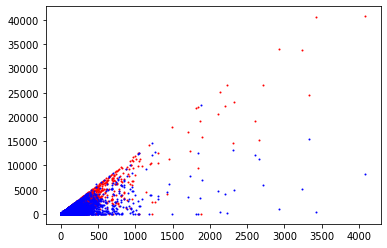

In [46]:
import matplotlib.pyplot as plt
# plt.xlim(0,  12000)
# plt.ylim(0, 12000)
plt.scatter(df["Monthly_Avg_Purchase"], df["ONEOFF_PURCHASES"], s=1, color="red")
plt.scatter(df["Monthly_Avg_Purchase"], df["INSTALLMENTS_PURCHASES"], s=1, color="blue")
plt.show()

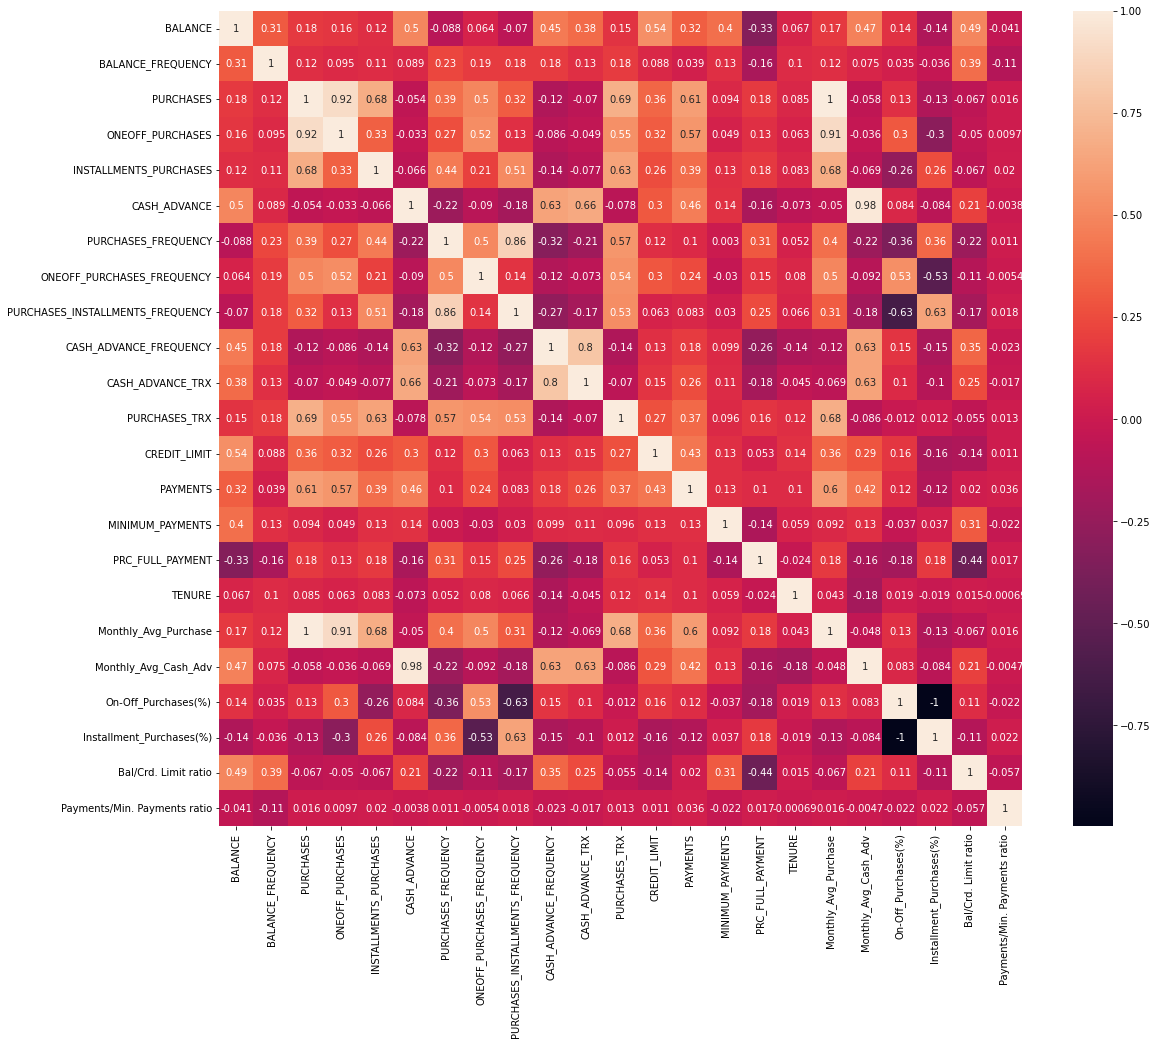

In [47]:
import seaborn as sns
matrix = df.corr()
plt.subplots(figsize=(18,15))
sns.heatmap(matrix, annot=True)
# print(matrix)

In [48]:
print((len(spenders)/len(df))*100)

print((155/200)*100)
print((45/200)*100)

2.3158869847151458
77.5
22.5


**CONCLUSION:-** 

Customers with a monthly average purchase amount of more than 500 come into the category of spenders which is around 2.31% of the customer base. Out of those 22.5% of them prefer installment purchases while 77.5% of them prefer one-off purchases. I also plotted the correlation matrix but nothing insightful seem to come out of it.

If the company targets those 2.31% of customers (spenders) more than others they are more likely to earns profits through advertisements, reward points etc.